## Data Preparation

### Initial Tasks

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns

In [140]:
raw_data = pd.read_csv("Titanic-Dataset.csv")
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Deleting Unnecessary Columns, Removing Rare NaN Rows, One-hot Encoding

In [142]:
raw_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
raw_data.dropna(subset="Embarked", inplace=True)
raw_data.reindex(index=np.arange(len(raw_data)))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,71.2833,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0.0,3.0,male,25.0,0.0,0.0,7.0500,S
885,0.0,3.0,female,39.0,0.0,5.0,29.1250,Q
886,0.0,2.0,male,27.0,0.0,0.0,13.0000,S
887,1.0,1.0,female,19.0,0.0,0.0,30.0000,S


In [143]:
raw_data["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [144]:
def col_to_one_hot(df: pd.DataFrame, col_name: str) -> None:

    unique_elements = np.unique(df[col_name])
    print(f"Uniqe elements in column \"{col_name}\": {unique_elements}")
    for ue in unique_elements:
        new_col_name = f"{col_name}:{ue}"
        df[new_col_name] = df[col_name].map(lambda x: 1 if x == ue else 0)
    df.drop(columns=[col_name, ], inplace=True)

In [145]:
col_to_one_hot(raw_data, "Pclass")
col_to_one_hot(raw_data, "Sex")
col_to_one_hot(raw_data, "Embarked")

Uniqe elements in column "Pclass": [1 2 3]
Uniqe elements in column "Sex": ['female' 'male']
Uniqe elements in column "Embarked": ['C' 'Q' 'S']


In [146]:
raw_data

,Survived,Age,SibSp,Parch,Fare,Pclass:1,Pclass:2,Pclass:3,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,NaN,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0


In [147]:
pd.crosstab(raw_data["SibSp"], raw_data["Parch"])

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,535,38,29,1,1,2,0
1,123,57,19,3,3,3,1
2,16,7,4,1,0,0,0
3,2,7,7,0,0,0,0
4,0,9,9,0,0,0,0
5,0,0,5,0,0,0,0
8,0,0,7,0,0,0,0


In [148]:
raw_data["SibSp"] = raw_data["SibSp"].map(lambda x: x if x < 4 else 4)
col_to_one_hot(raw_data, "SibSp")
raw_data.rename(columns={"SibSp:4": "SibSp:gte4"}, inplace=True)

raw_data["Parch"] = raw_data["Parch"].map(lambda x: x if x < 3 else 3)
col_to_one_hot(raw_data, "Parch")
raw_data.rename(columns={"Parch:3": "Parch:gte3"}, inplace=True)

Uniqe elements in column "SibSp": [0 1 2 3 4]
Uniqe elements in column "Parch": [0 1 2 3]


### Data Transformation, Normalization

In [149]:
raw_data.describe()

,Survived,Age,Fare,Pclass:1,Pclass:2,Pclass:3,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,SibSp:0,SibSp:1,SibSp:2,SibSp:3,SibSp:gte4,Parch:0,Parch:1,Parch:2,Parch:gte3
count,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.642093,32.096681,0.240720,0.206974,0.552306,0.350956,0.649044,0.188976,0.086614,0.724409,0.681665,0.235096,0.031496,0.017998,0.033746,0.760405,0.132733,0.089989,0.016873
std,0.486260,14.492933,49.697504,0.427761,0.405365,0.497536,0.477538,0.477538,0.391710,0.281427,0.447063,0.466093,0.424297,0.174752,0.133018,0.180676,0.427077,0.339477,0.286327,0.128868
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,38.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [150]:
age_average = raw_data["Age"].mean()
print(f"Average age: {age_average}")
raw_data["Age"] = raw_data["Age"].fillna(age_average)
age_std = raw_data["Age"].std()
print(f"Age std: {age_std}")
raw_data["Age"] = (raw_data["Age"] - age_average) / age_std

raw_data["LogFare"] = np.log(1 + raw_data["Fare"])
raw_data.drop(columns=["Fare", ], inplace=True)
log_fare_average = raw_data["LogFare"].mean()
print(f"Average LogFare: {log_fare_average}")
log_fare_std = raw_data["LogFare"].std()
print(f"LogFare std: {log_fare_std}")
raw_data["LogFare"] = (raw_data["LogFare"] - log_fare_average) / log_fare_std

Average age: 29.64209269662921
Age std: 12.968346294351784
Average LogFare: 2.9590236867667343
LogFare std: 0.9677496109541706


### Saving the Transformed Dataset

In [151]:
raw_data.to_csv("processed_titanic_dataset.csv", index=False)

### Visualization

In [152]:
raw_data

,Survived,Age,Pclass:1,Pclass:2,Pclass:3,Sex:female,Sex:male,Embarked:C,Embarked:Q,Embarked:S,SibSp:0,SibSp:1,SibSp:2,SibSp:3,SibSp:gte4,Parch:0,Parch:1,Parch:2,Parch:gte3,LogFare
0,0,-0.589288,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,-0.877097
1,1,0.644485,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1.365611
2,1,-0.280845,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,-0.795833
3,1,0.413153,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1.066196
4,0,0.413153,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,-0.781461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.203734,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,-0.330629
887,1,-0.820621,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.490792
888,0,0.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0.245525
889,1,-0.280845,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0.490792


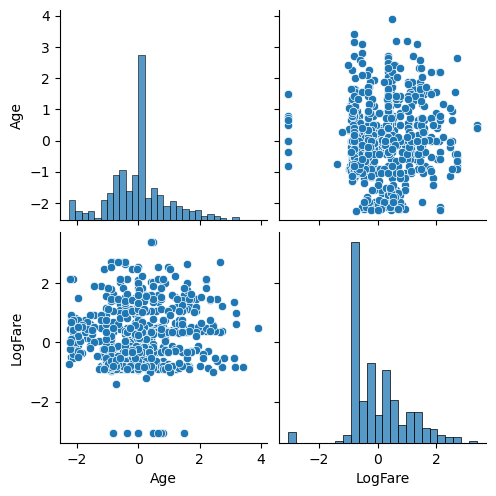

In [153]:
sns.pairplot(raw_data[["Age", "LogFare"]])

<Axes: >

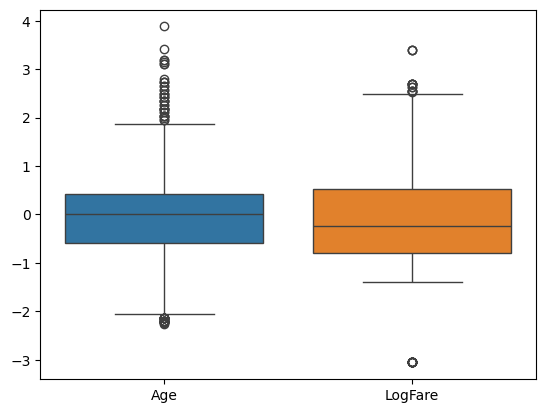

In [154]:
sns.boxplot(raw_data[["Age", "LogFare"]])

### Converting Data to NumPy Arrays

In [155]:
class_weight = 1 / raw_data["Survived"].value_counts()
class_weight = class_weight / np.sum(class_weight)
class_weight = {class_idx: class_value for class_idx, class_value in enumerate(class_weight.values)}
class_weight

{0: np.float64(0.38245219347581555), 1: np.float64(0.6175478065241845)}

In [156]:
x_all = raw_data.drop(columns=["Survived", ]).values
y_all = raw_data["Survived"].values

train_test_split = int(0.8 * len(x_all))
train_mask = np.arange(len(x_all)) < train_test_split

train_x = x_all[train_mask]
train_y = y_all[train_mask]
test_x = x_all[~train_mask]
test_y = y_all[~train_mask]

## Running Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [158]:
logistic_regression_configs = [
    dict(penalty=None, ),
    dict(penalty="l1", C=10, solver="liblinear", ),
    dict(penalty="l1", C=1, solver="liblinear", ),
    dict(penalty="l1", C=0.1, solver="liblinear", ),
    dict(penalty="l2", C=10,  ),
    dict(penalty="l2", C=1, ),
    dict(penalty="l2", C=0.1, ),
]

for config_dict in logistic_regression_configs:

    logistic_regression = LogisticRegression(class_weight=class_weight, **config_dict)
    logistic_regression.fit(train_x, train_y)

    train_y_pred = logistic_regression.predict(train_x)
    test_y_pred = logistic_regression.predict(test_x)

    config_str = [f"{key} = {value}" for key, value in config_dict.items()]
    config_str = ', '.join(map(str, config_str))
    print(f">>> Logistic regression config:\n{config_str}")    

    print(f"- Train accuracy: {accuracy_score(train_y, train_y_pred):.3f}")
    print(f"- Test accuracy: {accuracy_score(test_y, test_y_pred):.3f}")
    print(f"- Train precision: {precision_score(train_y, train_y_pred):.3f}")
    print(f"- Test precision: {precision_score(test_y, test_y_pred):.3f}")
    print(f"- Train recall: {recall_score(train_y, train_y_pred):.3f}")
    print(f"- Test recall: {recall_score(test_y, test_y_pred):.3f}")
    print(f"- Train F1: {f1_score(train_y, train_y_pred):.3f}")
    print(f"- Test F1: {f1_score(test_y, test_y_pred):.3f}")


>>> Logistic regression config:
penalty = None
- Train accuracy: 0.796
- Test accuracy: 0.820
- Train precision: 0.721
- Test precision: 0.738
- Train recall: 0.776
- Test recall: 0.762
- Train F1: 0.748
- Test F1: 0.750
>>> Logistic regression config:
penalty = l1, C = 10, solver = liblinear
- Train accuracy: 0.797
- Test accuracy: 0.815
- Train precision: 0.725
- Test precision: 0.727
- Train recall: 0.773
- Test recall: 0.762
- Train F1: 0.748
- Test F1: 0.744
>>> Logistic regression config:
penalty = l1, C = 1, solver = liblinear
- Train accuracy: 0.783
- Test accuracy: 0.809
- Train precision: 0.698
- Test precision: 0.699
- Train recall: 0.783
- Test recall: 0.810
- Train F1: 0.738
- Test F1: 0.750
>>> Logistic regression config:
penalty = l1, C = 0.1, solver = liblinear
- Train accuracy: 0.775
- Test accuracy: 0.809
- Train precision: 0.716
- Test precision: 0.746
- Train recall: 0.700
- Test recall: 0.698
- Train F1: 0.708
- Test F1: 0.721
>>> Logistic regression config:
penalt

## Running a Support Vector Classifier

In [159]:
from sklearn.svm import SVC

In [160]:
svc_configs = [
    dict(C=10, kernel="linear", ),
    dict(C=1, kernel="linear", ),
    dict(C=0.1, kernel="linear", ),
    dict(C=10, kernel="poly", degree=2),
    dict(C=1, kernel="poly", degree=2),
    dict(C=0.1, kernel="poly", degree=2),
    dict(C=10, kernel="poly", degree=5),
    dict(C=1, kernel="poly", degree=5),
    dict(C=0.1, kernel="poly", degree=5),
    dict(C=10, kernel="rbf"),
    dict(C=1, kernel="rbf"),
    dict(C=0.1, kernel="rbf"),
    dict(C=10, kernel="sigmoid"),
    dict(C=1, kernel="sigmoid"),
    dict(C=0.1, kernel="sigmoid"),
]

for config_dict in svc_configs:

    svc = SVC(class_weight=class_weight, **config_dict)
    svc.fit(train_x, train_y)

    train_y_pred = svc.predict(train_x)
    test_y_pred = svc.predict(test_x)

    config_str = [f"{key} = {value}" for key, value in config_dict.items()]
    config_str = ', '.join(map(str, config_str))
    print(f">>> SVC config:\n{config_str}")    

    print(f"- Train accuracy: {accuracy_score(train_y, train_y_pred):.3f}")
    print(f"- Test accuracy: {accuracy_score(test_y, test_y_pred):.3f}")
    print(f"- Train precision: {precision_score(train_y, train_y_pred):.3f}")
    print(f"- Test precision: {precision_score(test_y, test_y_pred):.3f}")
    print(f"- Train recall: {recall_score(train_y, train_y_pred):.3f}")
    print(f"- Test recall: {recall_score(test_y, test_y_pred):.3f}")
    print(f"- Train F1: {f1_score(train_y, train_y_pred):.3f}")
    print(f"- Test F1: {f1_score(test_y, test_y_pred):.3f}")


>>> SVC config:
C = 10, kernel = linear
- Train accuracy: 0.797
- Test accuracy: 0.809
- Train precision: 0.788
- Test precision: 0.796
- Train recall: 0.657
- Test recall: 0.619
- Train F1: 0.717
- Test F1: 0.696
>>> SVC config:
C = 1, kernel = linear
- Train accuracy: 0.789
- Test accuracy: 0.792
- Train precision: 0.759
- Test precision: 0.732
- Train recall: 0.671
- Test recall: 0.651
- Train F1: 0.713
- Test F1: 0.689
>>> SVC config:
C = 0.1, kernel = linear
- Train accuracy: 0.783
- Test accuracy: 0.798
- Train precision: 0.741
- Test precision: 0.737
- Train recall: 0.682
- Test recall: 0.667
- Train F1: 0.711
- Test F1: 0.700
>>> SVC config:
C = 10, kernel = poly, degree = 2
- Train accuracy: 0.827
- Test accuracy: 0.843
- Train precision: 0.777
- Test precision: 0.787
- Train recall: 0.780
- Test recall: 0.762
- Train F1: 0.778
- Test F1: 0.774
>>> SVC config:
C = 1, kernel = poly, degree = 2
- Train accuracy: 0.810
- Test accuracy: 0.860
- Train precision: 0.769
- Test precis

## Running a Decision Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dtc_configs = [
    dict(criterion="gini", max_depth=5),
    dict(criterion="gini", max_depth=10),
    dict(criterion="gini", max_depth=50),
    dict(criterion="entropy", max_depth=5),
    dict(criterion="entropy", max_depth=10),
    dict(criterion="entropy", max_depth=50),
    dict(criterion="log_loss", max_depth=5),
    dict(criterion="log_loss", max_depth=10),
    dict(criterion="log_loss", max_depth=50),
]

for config_dict in dtc_configs:

    dtc = DecisionTreeClassifier(class_weight=class_weight, **config_dict)
    dtc.fit(train_x, train_y)

    train_y_pred = dtc.predict(train_x)
    test_y_pred = dtc.predict(test_x)

    config_str = [f"{key} = {value}" for key, value in config_dict.items()]
    config_str = ', '.join(map(str, config_str))
    print(f">>> DecisionTreeClassifier config:\n{config_str}")    

    print(f"- Train accuracy: {accuracy_score(train_y, train_y_pred):.3f}")
    print(f"- Test accuracy: {accuracy_score(test_y, test_y_pred):.3f}")
    print(f"- Train precision: {precision_score(train_y, train_y_pred):.3f}")
    print(f"- Test precision: {precision_score(test_y, test_y_pred):.3f}")
    print(f"- Train recall: {recall_score(train_y, train_y_pred):.3f}")
    print(f"- Test recall: {recall_score(test_y, test_y_pred):.3f}")
    print(f"- Train F1: {f1_score(train_y, train_y_pred):.3f}")
    print(f"- Test F1: {f1_score(test_y, test_y_pred):.3f}")


>>> DecisionTreeClassifier config:
criterion = gini, max_depth = 5
- Train accuracy: 0.848
- Test accuracy: 0.860
- Train precision: 0.824
- Test precision: 0.797
- Train recall: 0.776
- Test recall: 0.810
- Train F1: 0.799
- Test F1: 0.803
>>> DecisionTreeClassifier config:
criterion = gini, max_depth = 10
- Train accuracy: 0.914
- Test accuracy: 0.764
- Train precision: 0.883
- Test precision: 0.648
- Train recall: 0.899
- Test recall: 0.730
- Train F1: 0.891
- Test F1: 0.687
>>> DecisionTreeClassifier config:
criterion = gini, max_depth = 50
- Train accuracy: 0.982
- Test accuracy: 0.747
- Train precision: 0.962
- Test precision: 0.615
- Train recall: 0.993
- Test recall: 0.762
- Train F1: 0.977
- Test F1: 0.681
>>> DecisionTreeClassifier config:
criterion = entropy, max_depth = 5
- Train accuracy: 0.830
- Test accuracy: 0.837
- Train precision: 0.817
- Test precision: 0.804
- Train recall: 0.726
- Test recall: 0.714
- Train F1: 0.769
- Test F1: 0.756
>>> DecisionTreeClassifier conf

## Running a KNN Classifier

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
knnc_configs = [
    dict(n_neighbors=5, weights="uniform", p=1),
    dict(n_neighbors=5, weights="distance", p=1),
    dict(n_neighbors=5, weights="uniform", p=2),
    dict(n_neighbors=5, weights="distance", p=2),
    dict(n_neighbors=10, weights="uniform", p=1),
    dict(n_neighbors=10, weights="distance", p=1),
    dict(n_neighbors=10, weights="uniform", p=2),
    dict(n_neighbors=10, weights="distance", p=2),
]

for config_dict in knnc_configs:

    knnc = KNeighborsClassifier(**config_dict)
    knnc.fit(train_x, train_y)

    train_y_pred = knnc.predict(train_x)
    test_y_pred = knnc.predict(test_x)

    config_str = [f"{key} = {value}" for key, value in config_dict.items()]
    config_str = ', '.join(map(str, config_str))
    print(f">>> KNeighborsClassifier config:\n{config_str}")    

    print(f"- Train accuracy: {accuracy_score(train_y, train_y_pred):.3f}")
    print(f"- Test accuracy: {accuracy_score(test_y, test_y_pred):.3f}")
    print(f"- Train precision: {precision_score(train_y, train_y_pred):.3f}")
    print(f"- Test precision: {precision_score(test_y, test_y_pred):.3f}")
    print(f"- Train recall: {recall_score(train_y, train_y_pred):.3f}")
    print(f"- Test recall: {recall_score(test_y, test_y_pred):.3f}")
    print(f"- Train F1: {f1_score(train_y, train_y_pred):.3f}")
    print(f"- Test F1: {f1_score(test_y, test_y_pred):.3f}")


>>> KNeighborsClassifier config:
n_neighbors = 5, weights = uniform, p = 1
- Train accuracy: 0.841
- Test accuracy: 0.837
- Train precision: 0.828
- Test precision: 0.804
- Train recall: 0.747
- Test recall: 0.714
- Train F1: 0.786
- Test F1: 0.756
>>> KNeighborsClassifier config:
n_neighbors = 5, weights = distance, p = 1
- Train accuracy: 0.982
- Test accuracy: 0.803
- Train precision: 0.996
- Test precision: 0.712
- Train recall: 0.957
- Test recall: 0.746
- Train F1: 0.976
- Test F1: 0.729
>>> KNeighborsClassifier config:
n_neighbors = 5, weights = uniform, p = 2
- Train accuracy: 0.841
- Test accuracy: 0.837
- Train precision: 0.828
- Test precision: 0.827
- Train recall: 0.747
- Test recall: 0.683
- Train F1: 0.786
- Test F1: 0.748
>>> KNeighborsClassifier config:
n_neighbors = 5, weights = distance, p = 2
- Train accuracy: 0.982
- Test accuracy: 0.798
- Train precision: 0.996
- Test precision: 0.714
- Train recall: 0.957
- Test recall: 0.714
- Train F1: 0.976
- Test F1: 0.714
>>

## Running a Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc_configs = [
    dict(n_estimators=10, criterion="gini", max_depth=5),
    dict(n_estimators=10, criterion="gini", max_depth=10),
    dict(n_estimators=10, criterion="entropy", max_depth=5),
    dict(n_estimators=10, criterion="entropy", max_depth=10),
    dict(n_estimators=50, criterion="gini", max_depth=5),
    dict(n_estimators=50, criterion="gini", max_depth=10),
    dict(n_estimators=50, criterion="entropy", max_depth=5),
    dict(n_estimators=50, criterion="entropy", max_depth=10),
    dict(n_estimators=100, criterion="gini", max_depth=5),
    dict(n_estimators=100, criterion="gini", max_depth=10),
    dict(n_estimators=100, criterion="entropy", max_depth=5),
    dict(n_estimators=100, criterion="entropy", max_depth=10),
]

for config_dict in rfc_configs:

    rfc = RandomForestClassifier(class_weight=class_weight, **config_dict)
    rfc.fit(train_x, train_y)

    train_y_pred = rfc.predict(train_x)
    test_y_pred = rfc.predict(test_x)

    config_str = [f"{key} = {value}" for key, value in config_dict.items()]
    config_str = ', '.join(map(str, config_str))
    print(f">>> RandomForestClassifier config:\n{config_str}")    

    print(f"- Train accuracy: {accuracy_score(train_y, train_y_pred):.3f}")
    print(f"- Test accuracy: {accuracy_score(test_y, test_y_pred):.3f}")
    print(f"- Train precision: {precision_score(train_y, train_y_pred):.3f}")
    print(f"- Test precision: {precision_score(test_y, test_y_pred):.3f}")
    print(f"- Train recall: {recall_score(train_y, train_y_pred):.3f}")
    print(f"- Test recall: {recall_score(test_y, test_y_pred):.3f}")
    print(f"- Train F1: {f1_score(train_y, train_y_pred):.3f}")
    print(f"- Test F1: {f1_score(test_y, test_y_pred):.3f}")


>>> RandomForestClassifier config:
n_estimators = 10, criterion = gini, max_depth = 5
- Train accuracy: 0.823
- Test accuracy: 0.843
- Train precision: 0.789
- Test precision: 0.797
- Train recall: 0.744
- Test recall: 0.746
- Train F1: 0.766
- Test F1: 0.770
>>> RandomForestClassifier config:
n_estimators = 10, criterion = gini, max_depth = 10
- Train accuracy: 0.927
- Test accuracy: 0.837
- Train precision: 0.938
- Test precision: 0.774
- Train recall: 0.870
- Test recall: 0.762
- Train F1: 0.903
- Test F1: 0.768
>>> RandomForestClassifier config:
n_estimators = 10, criterion = entropy, max_depth = 5
- Train accuracy: 0.820
- Test accuracy: 0.831
- Train precision: 0.788
- Test precision: 0.780
- Train recall: 0.736
- Test recall: 0.730
- Train F1: 0.761
- Test F1: 0.754
>>> RandomForestClassifier config:
n_estimators = 10, criterion = entropy, max_depth = 10
- Train accuracy: 0.930
- Test accuracy: 0.831
- Train precision: 0.942
- Test precision: 0.789
- Train recall: 0.874
- Test r